In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd
import sys

### Bisection Method and Functions

In [2]:
def bisection(a,b,f,atol, arr_a=[] , arr_b=[]):
    arr_a.clear()
    arr_b.clear()
    if a>=b or atol<=0 or f(a)*f(b)>0:
        print("Check your inputs")
        return None
    if f(a)==0:
        return f(a)
    if f(b)==0:
        return f(b)
    n = math.ceil(math.log((b-a)/(2*atol),2))
    i=0
    error=[]
    while i<n:
        arr_a.append(a)
        arr_b.append(b)
        mid_point = (b+a)/2
        
        if(f(mid_point)==0):
            return mid_point ,arr_a,arr_b,i
        elif f(a)*f(mid_point)<0:
            error.append(abs(mid_point-b))
            b = mid_point
        elif f(b)*f(mid_point)<0:
            error.append(abs(mid_point-a))
            a= mid_point
            
        else:
            print("Fail")
            return None
        i+=1
    return (b+a)/2 ,arr_a,arr_b,i,error

In [3]:
def draw_Bisection(x1,x2,res,f,arr_a,arr_b):
    seaborn.set(style='ticks')

    x = np.linspace(x1, x2)

    fig, ax = plt.subplots()
    f=np.vectorize(f)
    jet = cm = plt.get_cmap('hsv') 

    ax.plot(x, f(x),label='y =f(x)')
    ax.plot(x*1.1, x*0,label='X-axis')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    a = np.max(arr_b)
    first_y = f(a)
    constant = first_y/(len(arr_a)-1)

    max_value=0;
    flag = 0

    for i in arr_a:
        if(f(i)>max_value):
            max_value =f(i)
    for i in arr_b:
        if(f(i)>max_value):
            max_value = f(i)
            flag=1

    if flag==0:
        const_diff = max_value/len(arr_a)
        init = max_value*2
    else:    
        const_diff = max_value/len(arr_b)
        init = max_value*2

    a = len(arr_a)/(2*1.0)

    flag=0
    for i in range(len(arr_a)):
        if flag==0:
            ax.plot([arr_a[i],arr_a[i]],[0,f(arr_a[i])],'--', color="red" , label='Terminal Points')
            ax.plot([arr_b[i],arr_b[i]],[0,f(arr_b[i])],'--', color="red")
            ax.plot([arr_a[i],arr_b[i]],[init,init],'-', color="red", label='Search Interval')
            flag=1
        else:
            ax.plot([arr_a[i],arr_a[i]],[0,f(arr_a[i])],'--', color="red")
            ax.plot([arr_b[i],arr_b[i]],[0,f(arr_b[i])],'--', color="red")
            ax.plot([arr_a[i],arr_b[i]],[init,init],'-', color="red")
        init-=const_diff
    plt.legend()
    plt.savefig('bisection.png', dpi=1000)

In [4]:
def Bisection_Interval_Draw(f,n,a,b):
    iteration_arr=[]
    iteration_arr.clear()
    for i in range(n):
        res, arr_a, arr_b, iteration,e =bisection(a,b,f, 0.0005)
        iteration_arr.append(iteration)
        a-=0.05
        b+=0.05
    seaborn.set(style='ticks')

    x = np.linspace(0,50)
    y = np.linspace(0,50)

    fig, ax = plt.subplots()

    flag=0
    a=[]
    a.clear()
    for i in range(len(iteration_arr)):
        a.append(i)

    print(iteration_arr)
    ax.plot(a,iteration_arr,"." ,color="red")

    ax.plot(x*1.1, x*0)
    ax.plot(y*0, y)
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.show()

In [5]:
def BisectionConvergence(f,x1,x2,y1,y2):    
    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()
    
    res=[]
    res.clear()
    res = bisection(2.5,10,f,0.0005)
    
    flag=0
    a=[]

    for i in range(len(res[4])):
        a.append(i)

    ax.plot(a,res[4], color="red")

    ax.plot(x*1.1, x*0,label='Iteration step')
    ax.plot(y*0, y,label='Errors')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.savefig('error.png', dpi=1000)

3.00006103515625
12
2.9765625
5


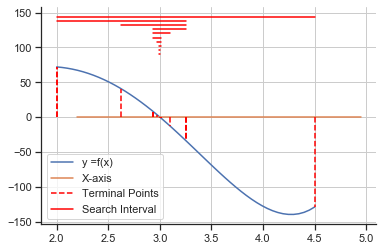

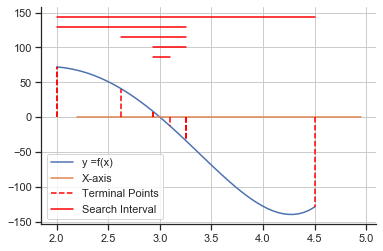

In [6]:
def f(x):
    return (x-3)*(x-5)*(x+4)*(x**2)
res=[]
res.clear()
res, arr_a, arr_b, iteration,error = bisection(2,4.5,f, 0.0005)
print(res) #3.00006103515625
print(iteration) #12 
draw_Bisection(2,4.5,res,f,arr_a,arr_b)
res=[]
res.clear()
res, arr_a, arr_b, iteration,error = bisection(2,4.5,f, 0.05) #With 100x higher error value
print(res) #2.9765625
print(iteration) #5
draw_Bisection(2,4.5,res,f,arr_a,arr_b)

6.283568802376558
13
6.283568802376558
6


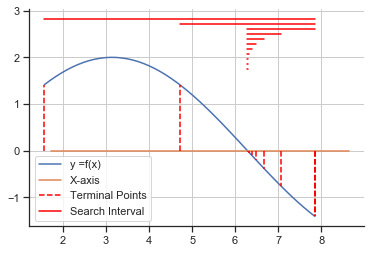

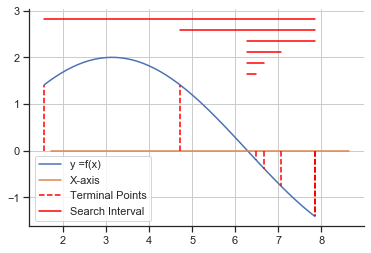

In [7]:
def f(x):
    return 2*math.sin(x/2)
res, arr_a, arr_b, iteration,error =bisection(math.pi/2,5*math.pi/2,f, 0.0005)
print(res) #6.283568802376558
print(iteration) #13
draw_Bisection(math.pi/2,5*math.pi/2,res,f,arr_a,arr_b)
print(res) #6.332272692391927
res, arr_a, arr_b, iteration,error =bisection(math.pi/2,5*math.pi/2,f, 0.05)
print(iteration) #6
draw_Bisection(math.pi/2,5*math.pi/2,res,f,arr_a,arr_b)

-3.9998016357421875
14
-3.966796875
7
0.00018310546875
14


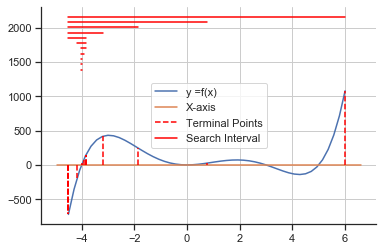

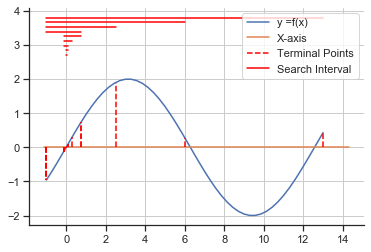

In [8]:
def f(x):
    return (x-3)*(x-5)*(x+4)*(x**2)
res, arr_a, arr_b, iteration,error = bisection(-4.5,6,f, 0.0005)
print(res)#-3.966796875 
print(iteration)#14 
draw_Bisection(-4.5,6,res,f,arr_a,arr_b)
res, arr_a, arr_b, iteration,error = bisection(-4.5,6,f, 0.05)
print(res) #-3.9998016357421875
print(iteration) #7
def h(x):
    return 2*math.sin(x/2)
res, arr_a, arr_b, iteration,error =bisection(-1,13,h, 0.0005)
print(res) #0.00018310546875
print(iteration) #14
draw_Bisection(-1,13,res,h,arr_a,arr_b)

0.00018310546875
14
0.01171875
8


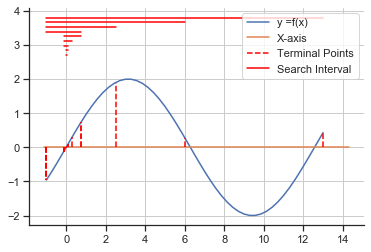

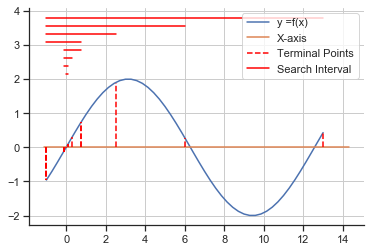

In [9]:
def h(x):
    return 2*math.sin(x/2)
res, arr_a, arr_b, iteration,error =bisection(-1,13,h, 0.0005)
print(res) #0.00018310546875
print(iteration) #14
draw_Bisection(-1,13,res,h,arr_a,arr_b)
res, arr_a, arr_b, iteration,error =bisection(-1,13,h, 0.05)
print(res) #0.01171875
print(iteration) #8
draw_Bisection(-1,13,res,h,arr_a,arr_b)

6.28271484375
12
6.28271484375
13


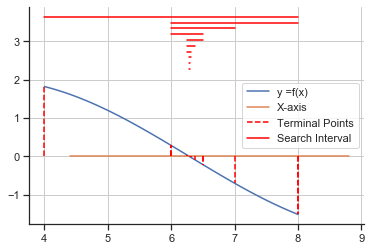

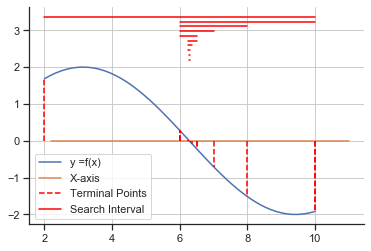

In [10]:
def f(x):
    return 2*math.sin(x/2)
res, arr_a, arr_b, iteration,error =bisection(4,8,f, 0.0005)
print(res) #6.28271484375
print(iteration) #12
draw_Bisection(4,8,res,h,arr_a,arr_b)
res, arr_a, arr_b, iteration,error =bisection(2,10,f, 0.0005)
print(res) #6.28271484375
print(iteration) #13
draw_Bisection(2,10,res,h,arr_a,arr_b)

[12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14]


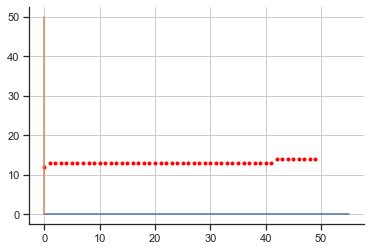

In [11]:
def h(x):
    return 2*math.sin(x/2)
Bisection_Interval_Draw(h,50,4,8)

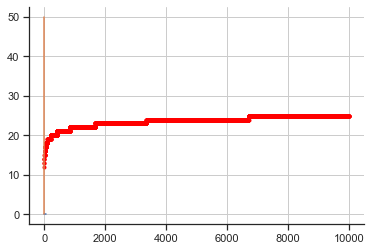

In [12]:
def h(x):
    return math.tanh(x)
arr= []
arr.clear()
a = -1.5
b = 1
diff = (b-a)/2
for i in range(10000):
    res, arr_a, arr_b, iteration,error = bisection(a,b,h, 0.0005)
    arr.append(iteration)
    a-=diff
    b+=diff
x = np.linspace(0,50)
y = np.linspace(0,50)
fig, ax = plt.subplots()

flag=0
a=[]
a.clear()
for i in range(len(arr)):
    a.append(i)

ax.plot(a,arr,"." ,color="red")

ax.plot(x*1.1, x*0)
ax.plot(y*0, y)
ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0) 

plt.show()   


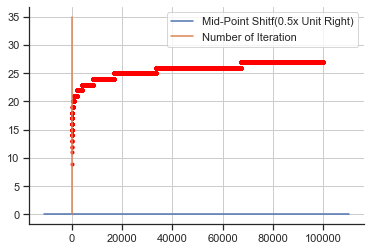

In [13]:
def f(x):
    return (x-3)*(x-5)*(x+4)*(x**2)
arr= []
a = 4.9
b = 5.2

diff = 1
mid_point =[]
res1=[]
for i in range(99999):
    mid_point.append(a/2+b/2)
    res, arr_a, arr_b, iteration,error = bisection(a,b,f, 0.0005)
    arr.append(iteration)
    res1.append(res)
    b+=diff
    
seaborn.set(style='ticks')

x = np.linspace(-10000,99999)
y = np.linspace(0,35)
fig, ax = plt.subplots()

flag=0
a=[]

for i in range(len(arr)):
    a.append(i)

ax.plot(a,arr,"." ,color="red")

ax.plot(x*1.1, x*0,label='Mid-Point Shitf(0.5x Unit Right)')
ax.plot(y*0, y,label='Number of Iteration')
ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0) 

plt.legend()
plt.show()

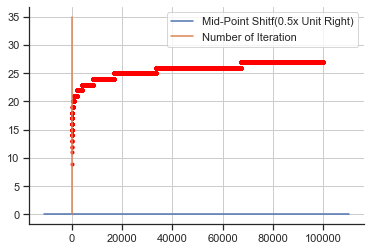

In [14]:
def f(x):
    return (x-3)*(x-5)*(x+4)*(x**2)
arr= []
a = 4.9
b = 5.2

diff = 1
mid_point =[]
res1=[]
for i in range(99999):
    mid_point.append(a/2+b/2)
    res, arr_a, arr_b, iteration,error = bisection(a,b,f, 0.0005)
    arr.append(iteration)
    res1.append(res)
    b+=diff
    
seaborn.set(style='ticks')

x = np.linspace(-10000,99999)
y = np.linspace(0,35)
fig, ax = plt.subplots()

flag=0
a=[]

for i in range(len(arr)):
    a.append(i)

ax.plot(a,arr,"." ,color="red")

ax.plot(x*1.1, x*0,label='Mid-Point Shitf(0.5x Unit Right)')
ax.plot(y*0, y,label='Number of Iteration')
ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0) 

plt.legend()
plt.show()

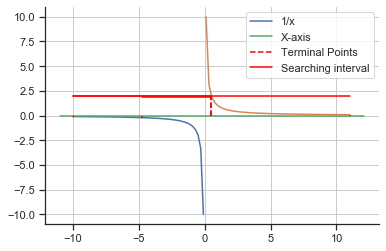

In [15]:
def piece_wise(x):
    if(x!= 0):
        return 1/x
    
res, arr_a, arr_b, iteration,error = bisection(-10,11,piece_wise, 0.0005)    
seaborn.set(style='ticks')

x1 = np.linspace(-10,-0.1)
x2 = np.linspace(0.1,11)
x = np.linspace(-10,11)
fig, ax = plt.subplots()

piece_wise = np.vectorize(piece_wise)
ax.plot(x1, piece_wise(x1),label='1/x')
ax.plot(x2, piece_wise(x2))
ax.plot(x*1.1, x*0,label='X-axis')
ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0) 

a = np.max(arr_b)
first_y = piece_wise(a)
constant = first_y/(len(arr_a)-1)

max_value=0;
flag = 0

max_value=1;
if flag==0:
    const_diff = max_value/len(arr_a)
    init = max_value*2
else:    
    const_diff = max_value/len(arr_b)
    init = max_value*2

    

a = len(arr_a)/(2*1.0)

flag=0
for i in range(3):
    if flag==0:
        ax.plot([arr_a[i],arr_a[i]],[0,piece_wise(arr_a[i])],'--', color="red" , label='Terminal Points')
        ax.plot([arr_b[i],arr_b[i]],[0,piece_wise(arr_b[i])],'--', color="red")
        ax.plot([arr_a[i],arr_b[i]],[init,init],'-', color="red", label='Searching interval')
        flag=1
    else:
        ax.plot([arr_a[i],arr_a[i]],[0,piece_wise(arr_a[i])],'--', color="red")
        ax.plot([arr_b[i],arr_b[i]],[0,piece_wise(arr_b[i])],'--', color="red")
        ax.plot([arr_a[i],arr_b[i]],[init,init],'-', color="red")
    init-=const_diff
plt.legend()
plt.show()

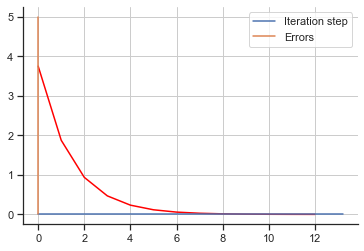

In [16]:
def f(x):
    return 2*math.sin(x/2)
BisectionConvergence(f,0,12,0,5)

### Fixed Point Iteration and Functions

In [17]:
def fixed_point(g, initial_x, max_error, points = []):
    points.clear()
    iteration = 0
    x = initial_x
    current_error=sys.maxsize
    error=[]
    error.clear()
    while max_error < current_error:
        temp = x
        points.append(x)
        x = g(temp)
        current_error = abs(x-temp)
        error.append(current_error)
        iteration+=1
    return x , points, iteration, error

In [18]:
def drawFixedPoint(g,res,linspace_start,linspace_end):

    seaborn.set(style='ticks')

    x = np.linspace(linspace_start,linspace_end)

    fig, ax = plt.subplots()

    cmap = plt.get_cmap('jet_r')

    g_new = np.vectorize(g)

    ax.plot(x, g_new(x), label="g(x)")
    ax.plot(x*1.1, x*0)
    ax.plot(x, x, label="y=x")
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    item = res[1]

    ax.plot([res[1][0], res[1][0]],[0, res[1][1]],'--', mew=1.8, ms=12)

    for i in range(len(res[1])):
        ax.plot([item[i], g_new(item[i])],[g_new(item[i]), g_new(item[i])],'--', mew=1.8, ms=12)
        ax.plot([g_new(item[i]), g_new(item[i])],[g_new(item[i]), g_new(g_new(item[i]))],'--', mew=1.8, ms=12)
        ax.plot(item[i],0,'|', mew=1.8, ms=12)


    plt.savefig('fixed.png', dpi=1000)
    plt.legend()
    plt.show()

In [19]:
def FixedPointShift(g,n,x1,x2,y1,y2):
    seaborn.set(style='ticks')
    arr= []
    arr.clear()
    init = 8
    for i in range(n):
        res = fixed_point(g, init, 0.005)
        arr.append(res[2])
        init+=0.5

    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()

    flag=0
    a=[]
    a.clear()
    for i in range(len(arr)):
        a.append(i)


    ax.plot(a,arr, color="red")

    ax.plot(x*1.1, x*0,label='Initial Right Shift 0.5 unit')
    ax.plot(y*0, y,label='Number of Iteration')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

In [20]:
def FixedPointConvergence(g,x1,x2,y1,y2):    
    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()
    
    res = fixed_point(g, 3, 0.0005)
    flag=0
    a=[]

    for i in range(len(res[3])):
        a.append(i)

    ax.plot(a,res[3], color="red")

    ax.plot(x*1.1, x*0,label='Iteration step')
    ax.plot(y*0, y,label='Errors')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

In [21]:
def FixedPointError(n,g,x1,x2,y1,y2):
    seaborn.set(style='ticks')
    error=5.0
    multiplier=1

    arr= []

    for i in range(n):
        err = error*multiplier
        res, point,iteration ,e= fixed_point(g, init, err)
        arr.append(iteration)
        multiplier*=0.1
    
    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()

    flag=0
    a=[]

    for i in range(n):
        a.append(i)


    ax.plot(a,arr, color="red")

    ax.plot(x*1.1, x*0,label='Error(5.10^x)')
    ax.plot(y*0, y,label='Number of Iteration')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

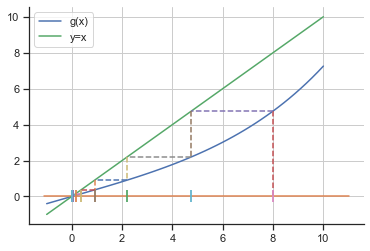

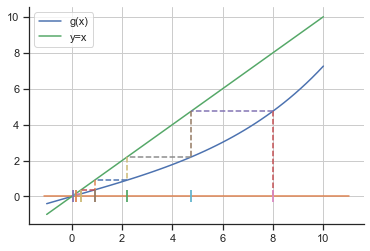

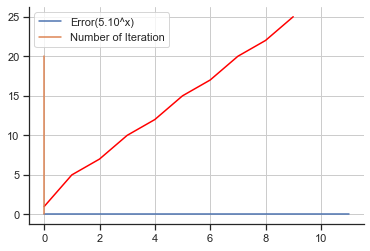

In [22]:
def g(x):
    return 2*math.sinh(x/5)
init = 8
res = fixed_point(g, init, 0.0005)
#iteration number:12
drawFixedPoint(g,res,-1,10)
res = fixed_point(g, init, 0.05)
#iteration number:12
drawFixedPoint(g,res,-1,10)
FixedPointError(10,g,0,10,0,20)


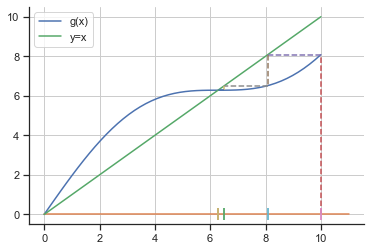

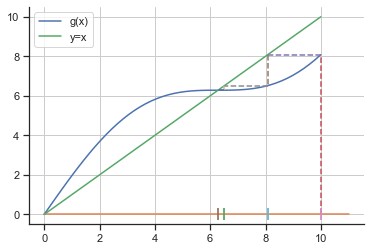

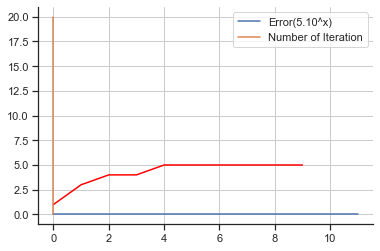

In [23]:
def g_h(x):
    return 2*math.sin(x/2)+x
init = 10
res = fixed_point(g_h, init, 0.0005)
#iteration number:5
drawFixedPoint(g_h,res,0,10)
res = fixed_point(g_h, init, 0.05)
#iteration number:4
drawFixedPoint(g_h,res,0,10)
FixedPointError(10,g_h,0,10,0,20)

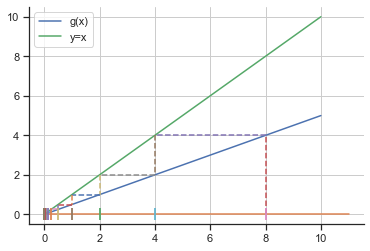

In [24]:
def f(x):
    return x**2
def g__f(x):
    return x-(x**2/(2*x))
init = 8
res = fixed_point(g__f, init, 0.0005)
drawFixedPoint(g__f,res,0.0001,10)

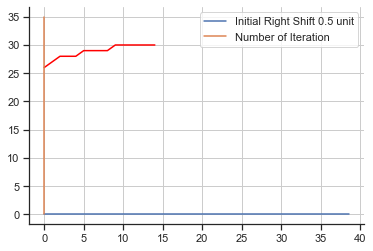

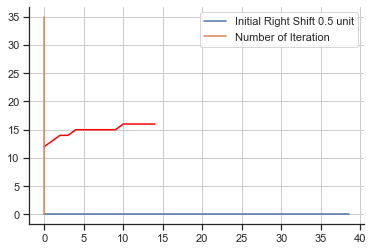

In [25]:
#Root Finding for (x-3)*(x-5)*(x+4)*(x**2)
def a(x):
    return math.pow((4*(x**4)+17*(x**3)-60*(x**2)),1/5)
def b(x):
    return 4+17/x+60/x**2
def c(x):
    return 4*x**5-12*x**4-34*x**3-60*x**2
init = 8
res_a = fixed_point(a, init, 0.0005)#Converges
FixedPointShift(a,15,0,35,0,35)
res_b = fixed_point(b, init, 0.0005)#Converges
FixedPointShift(b,15,0,35,0,35)
#res_c = fixed_point(c, init, 0.0005)#Does not Converge

In [26]:
#Root Finding for 2*sinh(x/5)
def d(x):
    return 2/5*math.cosh(x/5)
def e(x):
    return x-2*math.sinh(x/5)
def f(x):
    return x + 4*math.sinh(x/5)
init = 8
res_d = fixed_point(d, init, 0.0005)#Converges
#res_e = fixed_point(e, init, 0.0005)#Overflow
#res_f = fixed_point(f, init, 0.0005)#Overflow

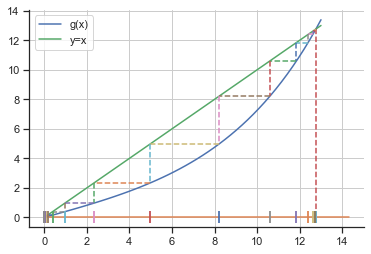

In [27]:
def g(x):
    return 2*math.sinh(x/5)
init = 12.76
res = fixed_point(g, init, 0.0000005)
#res =1.5710828877390292e-07
drawFixedPoint(g,res,0.0001,13)
init = 12.78
#res = fixed_point(g, init, 0.0000005)
#Overflow occurs

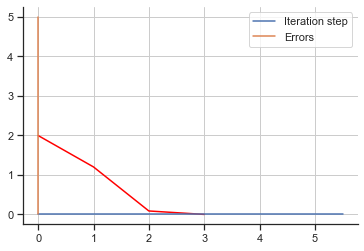

In [28]:
def g(x):
    return 2*math.sin(x/2)+x
FixedPointConvergence(g,0,5,0,5)

### Newtons Method and Functions

In [29]:
def NewtonsMethod(initial_x, f, diff_f, max_error):
    values=[]
    x = initial_x
    iteration=0
    current_error=sys.maxsize 
    error=[]
    while current_error>max_error:
        values.append(x)
        temp = x 
        x = x - (f(x)/diff_f(x))
        current_error = abs(x-temp)
        iteration+=1
        error.append(current_error)
    values.append(x)
    return x, values,iteration,error

In [30]:
def drawNewtons(f,res,x_inital,x_end,y_initial,y_end):
    seaborn.set(style='ticks')

    x = np.linspace(x_inital,x_end)
    y = np.linspace(y_initial,y_end)
    fig, ax = plt.subplots()

    cmap = plt.get_cmap('jet_r')

    f_new = np.vectorize(f)
    diff_f_new = np.vectorize(diff_f)
    
    ax.plot(x, f_new(x),".",label="f(x)")
    
    ax.plot(x*1.1, x*0)
    
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    item = res[1]

    for i in range(len(res[1])):
        ax.plot([item[i], item[i]],[0, f_new(item[i])],'--', mew=1.8, ms=12)
        if i!= len(res[1])-1:
            ax.plot([(item[i]), item[i+1]],[f_new(item[i]), 0],'--', mew=1.8, ms=12)
        ax.plot(item[i],0,'|', mew=1.8, ms=12)
                
                
  
    plt.savefig('newton.png', dpi=1000)
    plt.legend()
    plt.show() 

In [31]:
def Newtons_error_draw(n):    
    error=5.0
    multiplier=1

    arr= []

    for i in range(n):
        err = error*multiplier
        res, poimt,iteration,e = NewtonsMethod(8,f,diff_f,err)
        arr.append(iteration)
        multiplier*=0.1
    seaborn.set(style='ticks')

    x = np.linspace(0,n)
    y = np.linspace(0,30)
    fig, ax = plt.subplots()

    flag=0
    a=[]

    for i in range(n):
        a.append(i)
    ax.plot(a,arr, color="red")

    ax.plot(x*1.1, x*0,label='Error(5.10^x)')
    ax.plot(y*0, y,label='Number of Iteration')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

In [32]:
def Newton_Shift_Draw(n):    
    start = 100
    multiplier=1

    arr= []

    for i in range(n):
        res, poimt,iteration,e = NewtonsMethod(start,f,diff_f,0.005)
        arr.append(iteration)
        start-=1
    seaborn.set(style='ticks')

    x = np.linspace(0,n)
    y = np.linspace(0,30)
    fig, ax = plt.subplots()

    flag=0
    a=[]

    for i in range(n):
        a.append(i)


    ax.plot(a,arr, color="red")

    ax.plot(x*1.1, x*0,label='Left Shift(x unit)')
    ax.plot(y*0, y,label='Number of Iteration')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.savefig('error.png', dpi=1000)

In [33]:
def NewtonsConvergence(f,diff_f,x1,x2,y1,y2):    
    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()

    res = NewtonsMethod(10,f,diff_f,0.000005)

    flag=0
    a=[]

    for i in range(len(res[3])):
        a.append(i)


    ax.plot(a,res[3], color="red")

    ax.plot(x*1.1, x*0,label='Iteration step')
    ax.plot(y*0, y,label='Errors')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

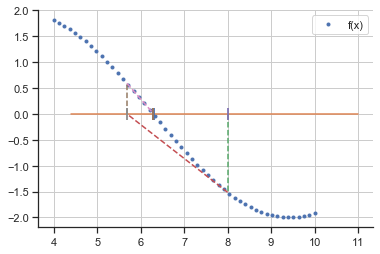

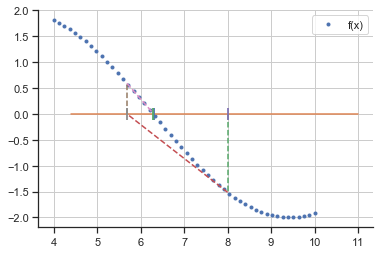

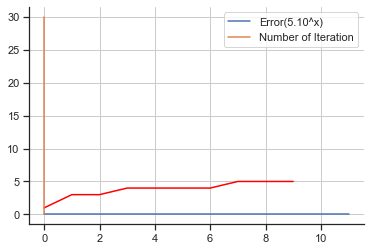

In [34]:
def f(x):
    return 2*math.sin(x/2)
def diff_f(x):
    return math.cos(x/2)
res = NewtonsMethod(8,f,diff_f,0.0005)
drawNewtons(f,res,4,10,0,30)
#iteration:4
res = NewtonsMethod(8,f,diff_f,0.05)
drawNewtons(f,res,4,10,0,30)
Newtons_error_draw(10)

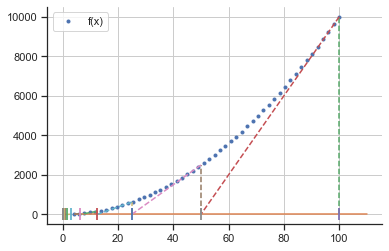

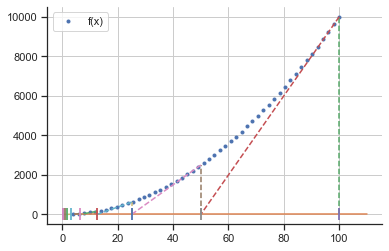

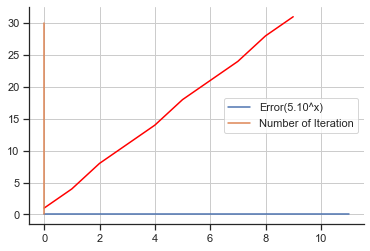

In [35]:
def f(x):
    return x**2
def diff_f(x):
    return 2*x
res = NewtonsMethod(100,f,diff_f,0.0005)
drawNewtons(f,res,4,100,0,30)
#iteration:18
res = NewtonsMethod(100,f,diff_f,0.05)
drawNewtons(f,res,4,100,0,30)
#iteration:11
Newtons_error_draw(10)

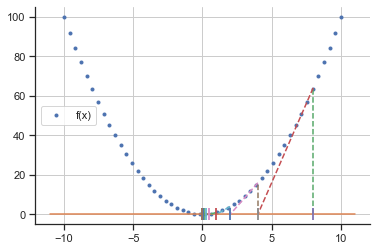

In [36]:
def f(x):
    return x**2
def diff_f(x):
    return 2*x
res = NewtonsMethod(8,f,diff_f,0.0005)
#iteration:14
#res:0.00048828125
drawNewtons(f,res,-10,10,0,30)

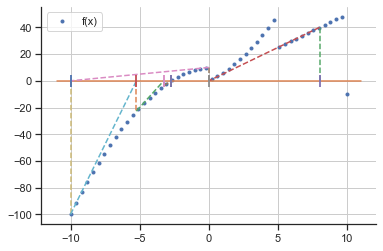

In [37]:
def f(x):
    if(x<=0):
        return -x**2+x+10
    if(x>0 and x<5):
        return x**2+5*x
    if(x>=5 and x<10):
        return 5*x
    else:
        return -x
def diff_f(x):
    if(x<=0):
        return -2*x+1
    if(x>0 and x<5):
        return 2*x+5
    if(x>=5 and x<10):
        return 5
    else:
        return -1
res = NewtonsMethod(8,f,diff_f,0.0005)
#Root: -2.7015621300171557
#Iteration:7
drawNewtons(f,res,-10,10,0,30)

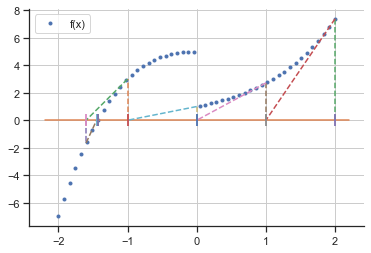

In [38]:
def f(x):
    if(x<0):
        return x**3-x**2+5
    if(x>=0):
        return math.exp(x)
def diff_f(x):
    if(x<0):
        return 3*x**2-2*x
    if(x>=0):
        return math.exp(x)
res = NewtonsMethod(2,f,diff_f,0.0005)
#Root: -1.4334276722808474
#Iteration:7
drawNewtons(f,res,-2,2,0,30)

In [39]:
def f(x):
    return x**2-5
def diff_f(x):
    return 2*x
#res = NewtonsMethod(0,f,diff_f,0.0005)#At x=0, slope is 0.
#ZeroDivisionError: division by zero
def f(x):
    return math.pow(x,1/3)
def diff_f(x):
    return (1/3)*math.pow(x,-2/3)
#res = NewtonsMethod(5,f,diff_f,0.0005)#At x=0, derivative does not exist 
#ValueError: math domain error

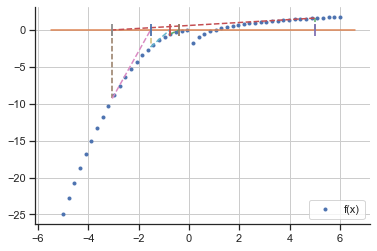

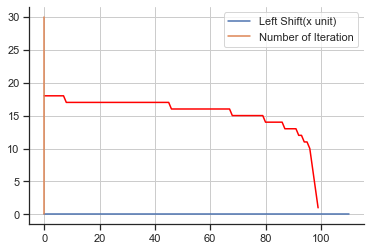

In [40]:
def f(x):
    if(x<=0):
        return -x**2
    else:
        return math.log(x)
def diff_f(x):
    if(x<=0):
        return -2*x
    else:
        return 1/x
res = NewtonsMethod(5,f,diff_f,0.5) #for observation of function graph
drawNewtons(f,res,-5,6,0,30)
start = 100
multiplier=1
arr= []
arr.clear()
for i in range(100):
    res, point,iteration,e = NewtonsMethod(start,f,diff_f,0.005)
    arr.append(iteration)
    start-=1
Newton_Shift_Draw(100)

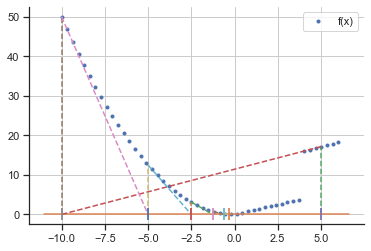

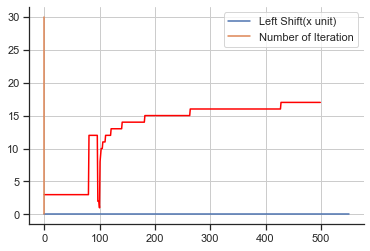

In [41]:
def f(x):
    if(x<0):
         return 1/2*x**2
    if(x<4):
        return x
    if(x>=20):
        return 35/18*(x-20)+35
    else:
        return 16/14*(x-4)+16
def diff_f(x):
    if(x<0):
         return x
    if(x<4):
        return 1
    if(x>=20):
        return 35/18
    else:
        return 16/14
res = NewtonsMethod(5,f,diff_f,0.5) #for observation of function graph
drawNewtons(f,res,-10,6,0,30)
start = 100
multiplier=1
arr= []
for i in range(500):
    res, point,iteration,e = NewtonsMethod(start,f,diff_f,0.005)
    arr.append(iteration)
    start-=1
Newton_Shift_Draw(500)

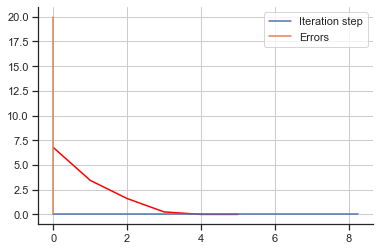

In [42]:
def f(x):
    return 2*math.sin(x/2)
def diff_f(x):
    return math.cos(x/2)
res = NewtonsMethod(10,f,diff_f,0.000005)
NewtonsConvergence(f,diff_f,0,7.5,0,20)

### Secant Method and Functions

In [43]:
def SecantMethod(initial_x0,initial_x1,  f, max_error):
    values=[]
    iteration=0
    current_error=sys.maxsize  
    last_x = initial_x0
    current_x= initial_x1
    error=[]
    while current_error>max_error:
        values.append(last_x)
        next_x = current_x - (f(current_x)*(current_x-last_x)/(f(current_x)-f(last_x)))
        current_error = abs(next_x-current_x)
        error.append(current_error)
        last_x = current_x
        current_x = next_x
        iteration+=1
    values.append(last_x)
    return current_x, values, iteration,error

In [44]:
def drawSecant(f,x1,x2,y1,y2,res):
    seaborn.set(style='ticks')

    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()

    cmap = plt.get_cmap('jet_r')

    f_new = np.vectorize(f)


    ax.plot(x, f_new(x),".")
    ax.plot(x*1.1, x*0)

    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    item = res[1]

    for i in range(len(res[1])):
        ax.plot([item[i], item[i]],[0, f_new(item[i])],'--', mew=1.8, ms=12,color="red")
        if i < len(res[1])-3:
            ax.plot([(item[i]), item[i+2]],[f_new(item[i]), 0],'--', mew=1.8, ms=12,color="red")
        if i < len(res[1])-2:
            ax.plot([(item[i]), item[i+1]],[f_new(item[i]), f_new(item[i+1])],'--', mew=1.8, ms=12, color="red")
        ax.plot(item[i],0,'|', mew=1.8, ms=12)

    plt.savefig('secant.png', dpi=1000)
    plt.show()

In [45]:
def Secant_Error_Draw(n,y2):    
    error=5.0
    multiplier=1

    arr= []

    for i in range(n):
        err = error*multiplier
        res, poimt,iteration,e = SecantMethod(-2,6,f,err)
        arr.append(iteration)
        multiplier*=0.1
    seaborn.set(style='ticks')

    x = np.linspace(0,n)
    y = np.linspace(0,y2)
    fig, ax = plt.subplots()

    flag=0
    a=[]

    for i in range(n):
        a.append(i)

    ax.plot(a,arr, color="red")

    ax.plot(x*1.1, x*0,label='Error(5.10^x)')
    ax.plot(y*0, y,label='Number of Iteration')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

In [46]:
def Secant_Shift_Draw(n,g1,g2):
    arr= []

    for i in range(n):
        res, poimt,iteration,e = SecantMethod(g1,g2,f,0.005)
        arr.append(iteration)
        g2+=1
    seaborn.set(style='ticks')


    x = np.linspace(0,n)
    y = np.linspace(0,5)
    fig, ax = plt.subplots()

    flag=0
    a=[]

    for i in range(n):
        a.append(i)


    ax.plot(a,arr, color="red")

    ax.plot(x*1.1, x*0,label='Guess 2 Right Shift')
    ax.plot(y*0, y,label='Number of Iteration')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show() 

In [47]:
def SecantConvergence(f,x1,x2,y1,y2):
    res=[]
    res.clear()
    res = SecantMethod(3,5,f,0.0005)
    
    x = np.linspace(x1,x2)
    y = np.linspace(y1,y2)
    fig, ax = plt.subplots()

    flag=0
    a=[]

    for i in range(len(res[3])):
        a.append(i)

    ax.plot(a,res[3], color="red")

    ax.plot(x*1.1, x*0,label='Iteration step')
    ax.plot(y*0, y,label='Errors')
    ax.grid(True, which='both')
    seaborn.despine(ax=ax, offset=0) 

    plt.legend()
    plt.show()

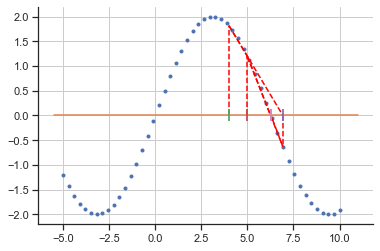

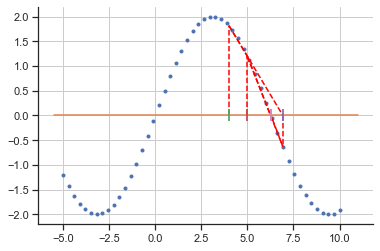

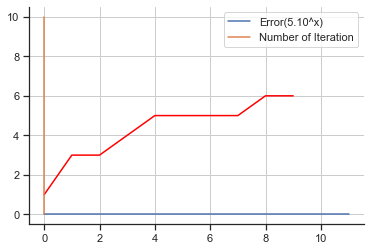

In [48]:
def f(x):
    return 2*math.sin(x/2)
res = SecantMethod(4,5,f,0.0005)
drawSecant(f,-5,10,0,10,res)
#iteration:5
#res=6.283185299259055
res = SecantMethod(4,5,f,0.0005)
drawSecant(f,-5,10,0,10,res)
#iteration:3
#res:6.283564205089842
Secant_Error_Draw(10,10) 

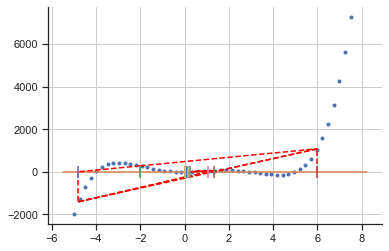

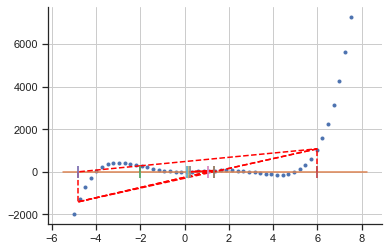

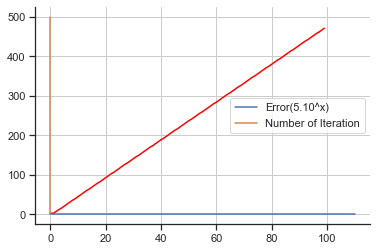

In [49]:
def f(x):
    return (x-3)*(x-5)*(x+4)*(x**2)
res = SecantMethod(-2,6,f,0.0005)
drawSecant(f,-5,7.5,0,7.5,res)
#iteration:16
#res:0.0007907105180212549
res = SecantMethod(-2,6,f,0.05)
drawSecant(f,-5,7.5,0,7.5,res)
#iteration:7
#res:0.061668242961135315
Secant_Error_Draw(100,500) 

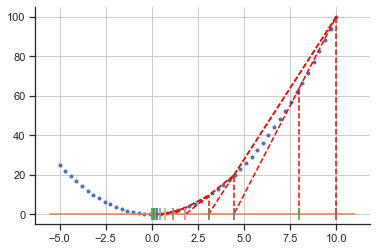

In [50]:
def f(x):
    return x**2
res = SecantMethod(8,10,f,0.0005)
#iteration:20
#res:0.0005154041412722751
drawSecant(f,-5,10,0,100,res)

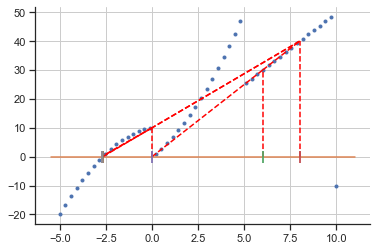

In [51]:
def f(x):
    if(x<=0):
        return -x**2+x+10
    if(x>0 and x<5):
        return x**2+5*x
    if(x>=5 and x<10):
        return 5*x
    else:
        return -x
res = SecantMethod(6,8,f,0.0005)
#Root: -2.7015615575363583
#Iteration:5
drawSecant(f,-5,10,0,100,res)

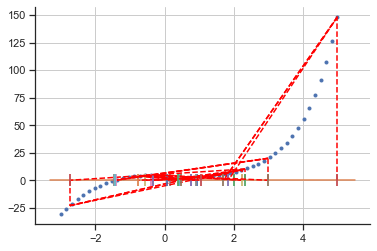

In [52]:
def f(x):
    if(x<0):
        return x**3-x**2+5
    if(x>=0):
        return math.exp(x)
res = SecantMethod(2,5,f,0.0005)
#Root: -1.433427675463692
#Iteration:27
drawSecant(f,-3,5,0,100,res)

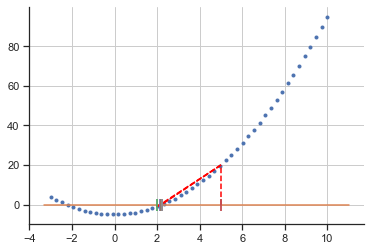

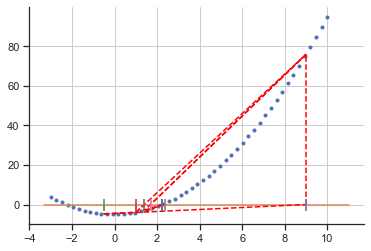

In [53]:
def f(x):
    return x**2-5
res = SecantMethod(2,5,f,0.0005) 
#res:2.2360679764106504
#iteration:5
drawSecant(f,-3,10,0,100,res)
res = SecantMethod(-0.5,1,f,0.0005)
#res:2.2360679771124263
#iteration:8
drawSecant(f,-3,10,0,100,res)
#res = SecantMethod(-0.5,-0.5,f,0.0005)
#ZeroDivisionError: float division by zero

In [54]:
def f(x):
    return math.pow(x,1/3)
#res = SecantMethod(0,5,f,0.0005)#At x=0, derivative does not exist 
#ValueError: math domain error

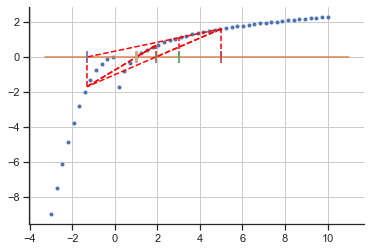

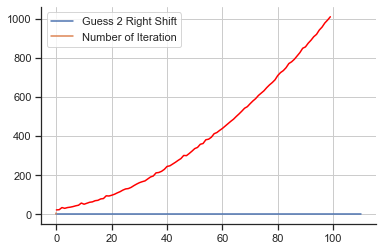

In [55]:
def f(x):
    if(x<=0):
        return -x**2
    else:
        return math.log(x)
res = SecantMethod(3,5,f,0.0005) #for observation of function graph
drawSecant(f,-3,10,0,100,res)
arr= []
g1=-2
g2=6
for i in range(10):
    res, point,iteration,e = SecantMethod(g1,g2,f,0.005)
    arr.append(iteration)
    g2+=1
Secant_Shift_Draw(100,g1,g2)

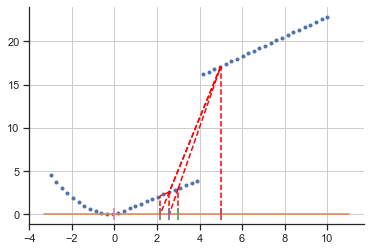

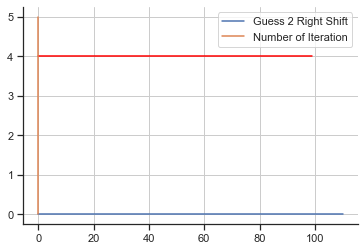

In [56]:
def f(x):
    if(x<0):
         return 1/2*x**2
    if(x<4):
         return x
    if(x>=20):
        return 35/18*(x-20)+35
    else:
        return 16/14*(x-4)+16
res = SecantMethod(3,5,f,0.0005) #for observation of function graph
drawSecant(f,-3,10,0,100,res)
arr= []
g1=3
g2=5
for i in range(100):
    res, point,iteration,e = SecantMethod(g1,g2,f,0.005)
    arr.append(iteration)
    g2+=1
Secant_Shift_Draw(100,g1,g2)

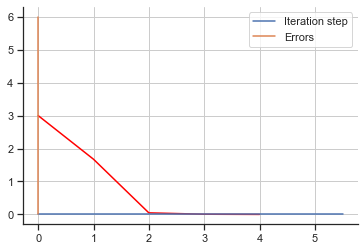

In [57]:
def f(x):
    return 2*math.sin(x/2)
res=[]
res.clear()
res = SecantMethod(3,5,f,0.0005)
SecantConvergence(f,0,5,0,6)

### Question3

In [58]:
import numpy as np
import pandas as pd
#File reading
data = np.genfromtxt('cit-HepTh.txt', delimiter = "\t", dtype="int")

#Nodes: 27770 Edges: 352807

#Adjacency Matrix 
adjacency_matrix = np.zeros((27770,27770), dtype=float)

#List for citation numbers and 0 citation checking
zero_citation_check=[True for i in range(27770)]
citation_number=[0 for i in range(27770)]

#For indexing papers from 0 to 27770
id_dict = {}
name_dict={}
#Current index which can be given 
dictionary_counter=0

#Reading Data
for i in range(352807):
    #From and to paper numbers
    frm = data[i,0]
    to =  data[i,1]
    #Check for already assigned indices 
    if frm not in id_dict:
        #Assigning index id
        id_dict.update( {frm: dictionary_counter} )
        name_dict.update({dictionary_counter: frm})
        dictionary_counter+=1

    if to not in id_dict:
        #Assigning index id
        id_dict.update({to: dictionary_counter})
        name_dict.update({dictionary_counter: to})
        dictionary_counter+=1
        
    from_id = id_dict[frm]
    to_id = id_dict[to]

    #Incrementing cite number of paper
    citation_number[from_id]+=1
    zero_citation_check[from_id]=False

#Filling adjacency matrix with proper values
for i in range(352807):
    frm = data[i,0]
    to =  data[i,1]
    
    from_id = id_dict[frm]
    to_id = id_dict[to]

    adjacency_matrix[to_id,from_id]=1/citation_number[from_id]

filler = 1/27770

#Fiiling columns which contain full zeros
for i in range(len(zero_citation_check)-1):
    if zero_citation_check[i]==True:
        adjacency_matrix[:,i]=filler

#Initial guess
vector = np.full((27770,1), filler)

#Power Method
for i in range(20):
    vector = np.matmul(adjacency_matrix,vector)

#For finding biggest 10 values  
a = vector.transpose()
a= a[0,:]
lst = pd.Series(a)
i = lst.nlargest(10)

res = i.index.values.tolist()
#Printing paper number of corresponding 10 papers
for i in res:
    print(name_dict[i])

OSError: cit-HepTh.txt not found.